In [1]:
import numpy as np


def random_wishart(nmod): # pos def metric
    vars = [1./np.float(nmod)**(1./2.) for i in range(nmod + 2)]
    #A = np.array([np.random.normal(loc = 0, scale = vars[pp],size = nmod )for pp in range(nmod)])
    A00 = np.random.normal(loc = 0, scale = vars[nmod + 1])
    A0a = np.array(np.random.normal(loc = 0, scale = vars[nmod],size = nmod))
    Ap0a = np.array(np.random.normal(loc = 0, scale = vars[nmod],size = nmod))
    Aab = np.array([np.random.normal(loc = 0, scale = vars[pp],size = nmod)for pp in range(nmod)])

    P00  = A00**2 + sum([ent**2 for ent in A0a])
    P0a = np.array([A00*ent for ent in Ap0a]) + np.dot(A0a,Aab)
    Pab = np.dot(Aab.transpose(),Aab) + [[Ap0a[i]*Ap0a[j] for i in range(len(Ap0a))] for j in range(len(Ap0a))]
    m = Pab/P00 - [[P0a[i]*P0a[j] for i in range(len(P0a))] for j in range(len(P0a))]/P00**2
    return m

def sample(nmod,numdraws):
    #samplemoments = [[] for kk in range(self.nmoments)] 
    evals = []
    for num in range(numdraws):
        evals  = evals + list(np.linalg.eig(random_wishart(nmod))[0])
    return evals



In [2]:
h11s = [10,30,50]
numdraws = [10,20,30,40,50]
data = {'h11': [], 'evals': [], 'numdraws': []}

num_samples_per = 1
for h11 in h11s:
    for numdraw in numdraws:
        evals = []
        for _ in range(num_samples_per): evals += sample(h11,numdraw)
        for e in evals:
            data['h11'].append(h11)
            data['numdraws'].append(numdraw)
            data['evals'].append(e)
            
import pandas as pd
df = pd.DataFrame(data)

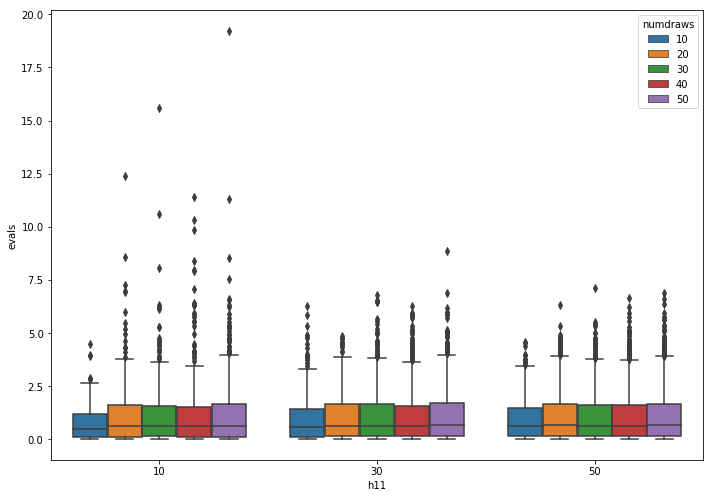

In [4]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

sns.boxplot(x='h11',y='evals',hue='numdraws',data=df)

# Wasserstein Sample Efficiency

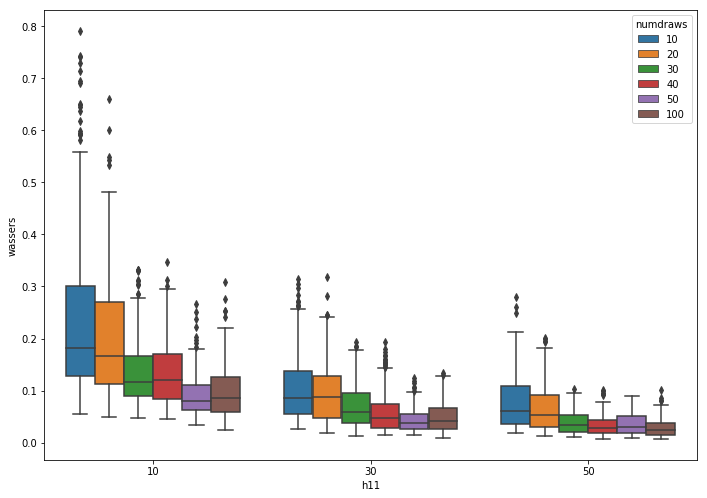

In [67]:
from scipy.stats import wasserstein_distance

h11s = [10,30,50]
numdraws = [10,20,30,40,50,100]
data = {'h11': [], 'wassers': [], 'numdraws': []}

num_samples_per = 20
for h11 in h11s:
    for numdraw in numdraws:
        evals = [sample(h11,numdraw) for _ in range(num_samples_per)]
        wassers = [wasserstein_distance(evals[i1],evals[i2]) for i1 in range(num_samples_per) for i2 in range(i1+1,num_samples_per)]
        for wasser in wassers:
            data['h11'].append(h11)
            data['numdraws'].append(numdraw)
            data['wassers'].append(wasser)
            
import pandas as pd
df = pd.DataFrame(data)
rcParams['figure.figsize'] = 11.7,8.27

sns.boxplot(x='h11',y='wassers',hue='numdraws',data=df)

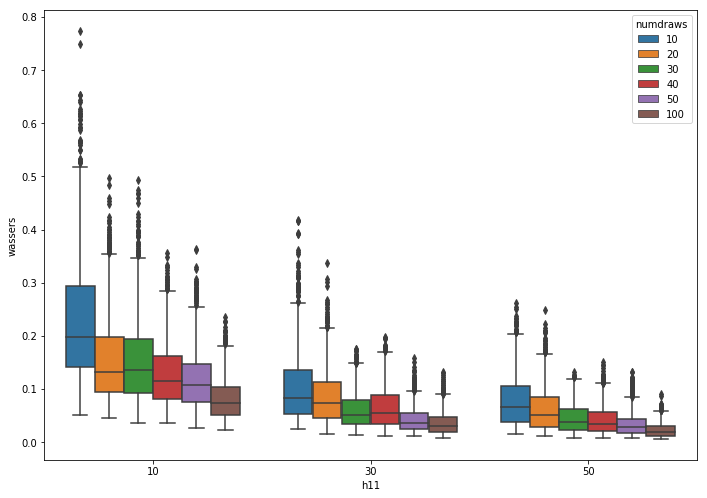

In [69]:
from scipy.stats import wasserstein_distance

h11s = [10,30,50]
numdraws = [10,20,30,40,50,100]
data = {'h11': [], 'wassers': [], 'numdraws': []}

num_samples_per = 50
for h11 in h11s:
    for numdraw in numdraws:
        evals = [sample(h11,numdraw) for _ in range(num_samples_per)]
        wassers = [wasserstein_distance(evals[i1],evals[i2]) for i1 in range(num_samples_per) for i2 in range(i1+1,num_samples_per)]
        for wasser in wassers:
            data['h11'].append(h11)
            data['numdraws'].append(numdraw)
            data['wassers'].append(wasser)
            
import pandas as pd
df = pd.DataFrame(data)
rcParams['figure.figsize'] = 11.7,8.27

sns.boxplot(x='h11',y='wassers',hue='numdraws',data=df)

# Dumb sanity check

In [79]:
num = 1000000
a, b = [np.random.normal(.5,.1) for _ in range(num)], [np.random.normal(.6,.1) for _ in range(num)]

print(wasserstein_distance(a,b))

0.09987389105968958
